# 创建测试数据

In [10]:
#导入numpy包 
import numpy as np
#设置numpy的输出格式  
np.set_printoptions(threshold=100,precision= 2,suppress=True)
#定义测试数据
M = np.array([[1,1,1,2,1],
              [2,3,2,4,2],
              [8,8,8,16,8],
              [9,9,9,12,9],
              [4,4,4,8,4], 
              [2,2,2,4,2]])

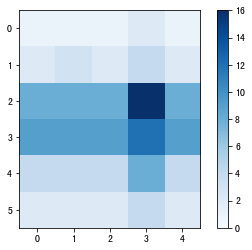

In [12]:
#定义可视化函数，方便后续矩阵绘制
def plotM(M,vmax):
    import matplotlib.pyplot as plt
    #绘制矩阵
    plt.imshow(M,vmin = 0,vmax = vmax,cmap = 'Blues')
    #显示颜色的色标
    plt.colorbar()
    plt.show()
plotM(M,M.max())

# SVD分解

In [143]:
#SVD分解
U,vals,VT =np.linalg.svd(M)
V = VT.T
U,vals,V

(array([[-0.08, -0.07, -0.02,  0.99,  0.01,  0.  ],
        [-0.18, -0.04,  0.98,  0.  ,  0.  ,  0.  ],
        [-0.66, -0.55, -0.14, -0.1 ,  0.49,  0.  ],
        [-0.63,  0.77, -0.08, -0.  , -0.  ,  0.  ],
        [-0.33, -0.27, -0.07, -0.04, -0.78, -0.45],
        [-0.16, -0.14, -0.04, -0.02, -0.39,  0.89]]),
 array([34.26,  3.28,  0.85,  0.  ,  0.  ]),
 array([[-0.38,  0.33, -0.29,  0.82,  0.  ],
        [-0.38,  0.31,  0.87,  0.  , -0.  ],
        [-0.38,  0.33, -0.29, -0.41,  0.7 ],
        [-0.65, -0.76, -0.01, -0.  , -0.  ],
        [-0.38,  0.33, -0.29, -0.4 , -0.71]]))

In [144]:
Sigma = np.array([[vals[0],0,0,0,0],
                  [0,vals[1],0,0,0],
                  [0,0,vals[2],0,0],
                  [0,0,0,vals[3],0],
                  [0,0,0,0,vals[4]],
                  [0,0,0,0,0]])
Sigma

array([[34.26,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  3.28,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.85,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [145]:
#乘回去看看是不是能够构成原始矩阵
M_=np.dot(np.dot(U,Sigma),V.T)
M_

array([[ 1.,  1.,  1.,  2.,  1.],
       [ 2.,  3.,  2.,  4.,  2.],
       [ 8.,  8.,  8., 16.,  8.],
       [ 9.,  9.,  9., 12.,  9.],
       [ 4.,  4.,  4.,  8.,  4.],
       [ 2.,  2.,  2.,  4.,  2.]])

# 可视化各模式

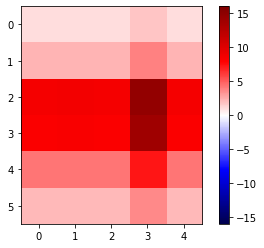

In [146]:
#绘制第一个模式重构的数据
M1 = vals[0]*np.dot(U[:,0:1],V[:,0:1].T)
#可视化出来
plotM(M1,M.max())

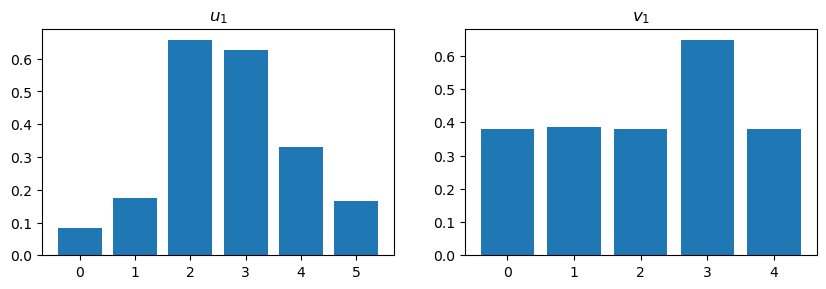

In [157]:
#对这两个向量绘制柱状图
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,3),dpi = 100)
#绘制u1向量的柱状图
ax1 = plt.subplot(121)
plt.sca(ax1)
plt.bar(range(6),-U[:,0])
plt.title('$u_1$')
#绘制v1向量的柱状图
ax2 = plt.subplot(122)
plt.sca(ax2)
plt.bar(range(5),-V[:,0])
plt.title('$v_1$')
plt.show()

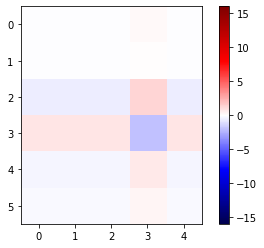

In [148]:
#绘制第二个模式重构的数据
M2 = vals[1]*np.dot(U[:,1:2],V[:,1:2].T)
plotM(M2,M.max())

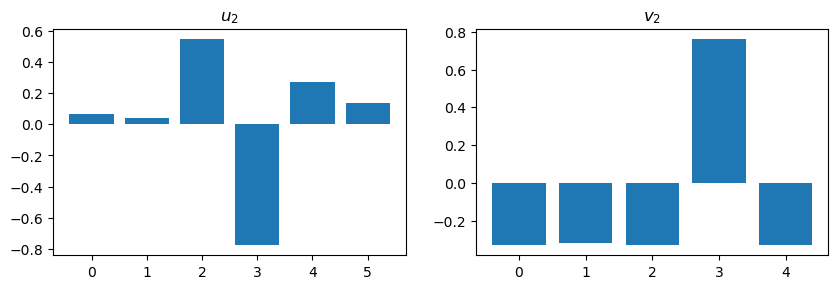

In [158]:
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,3),dpi = 100)
ax1 = plt.subplot(121)
#绘制u2向量的柱状图
plt.sca(ax1)
plt.bar(range(6),-U[:,1])
plt.title('$u_2$')
#绘制v2向量的柱状图
ax2 = plt.subplot(122)
plt.sca(ax2)
plt.bar(range(5),-V[:,1])
plt.title('$v_2$')
plt.show()